# NNSAE on FashionMNIST Dataset
Online learning and generalization of parts-based image representations by Non-Negative Sparse Autoencoders from Lemme et al. (2011).
* Dimension of the encoding : 100
* Shallow Encoder and Decoder with tied weights $W_E = W_D^T$ 
* Sparsity of the encoding enforced with Intrinsic Plasticity:
    * Learning rate for synaptic plasticity of the read-out layer : lrateRO = 0.01
    * Learning rate for intrinsic plasticity : lrateIP = 0.001
* Non-Negativity of the weigths enforced with asymetric weight decay (no decay on positive weights) 
* In the original paper, the data is scaled by multiplying it by 0.25, but MNIST was between 0 and 255 while FashionMNIST is already between 0 and 1. So I removed the scaling from this notebook as it did not affect the visual quality of the reconstruction and of the max_approximation. Note as well that is did not affect the measured sparsity of the encoding.

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
import atoms_analysis

Using TensorFlow backend.


In [2]:
#Loading FashionMNIST
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=False, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2] = 31
idx_small[5] = 32
idx_small[7] = 35
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
#Loading the encodings, reconstructions and atoms from NNSAE
h_test = io.loadmat("../Results/MNIST_Fashion/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/x_test_rec.mat")['x_test_rec']
atoms = io.loadmat("../Results/MNIST_Fashion/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/W.mat")['W']
x_rec_test = x_rec_test.reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
x_rec_small = x_rec_test[idx_small]

(Test) Original images and reconstructions - Reconstruction error:  0.05141151048128018


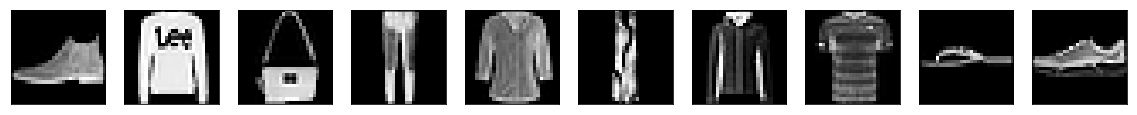

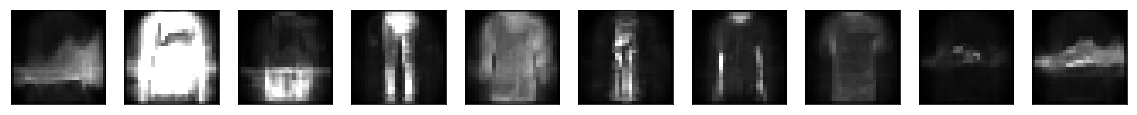

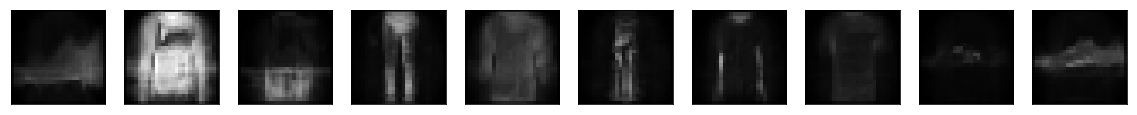

Histograms of the encodings - Sparsity (Hoyer):  0.22032299763251623


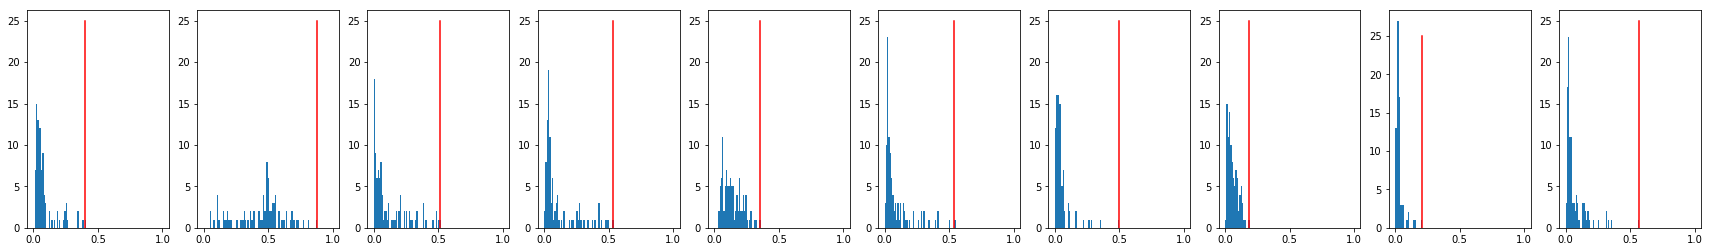

Atom images of the decoder


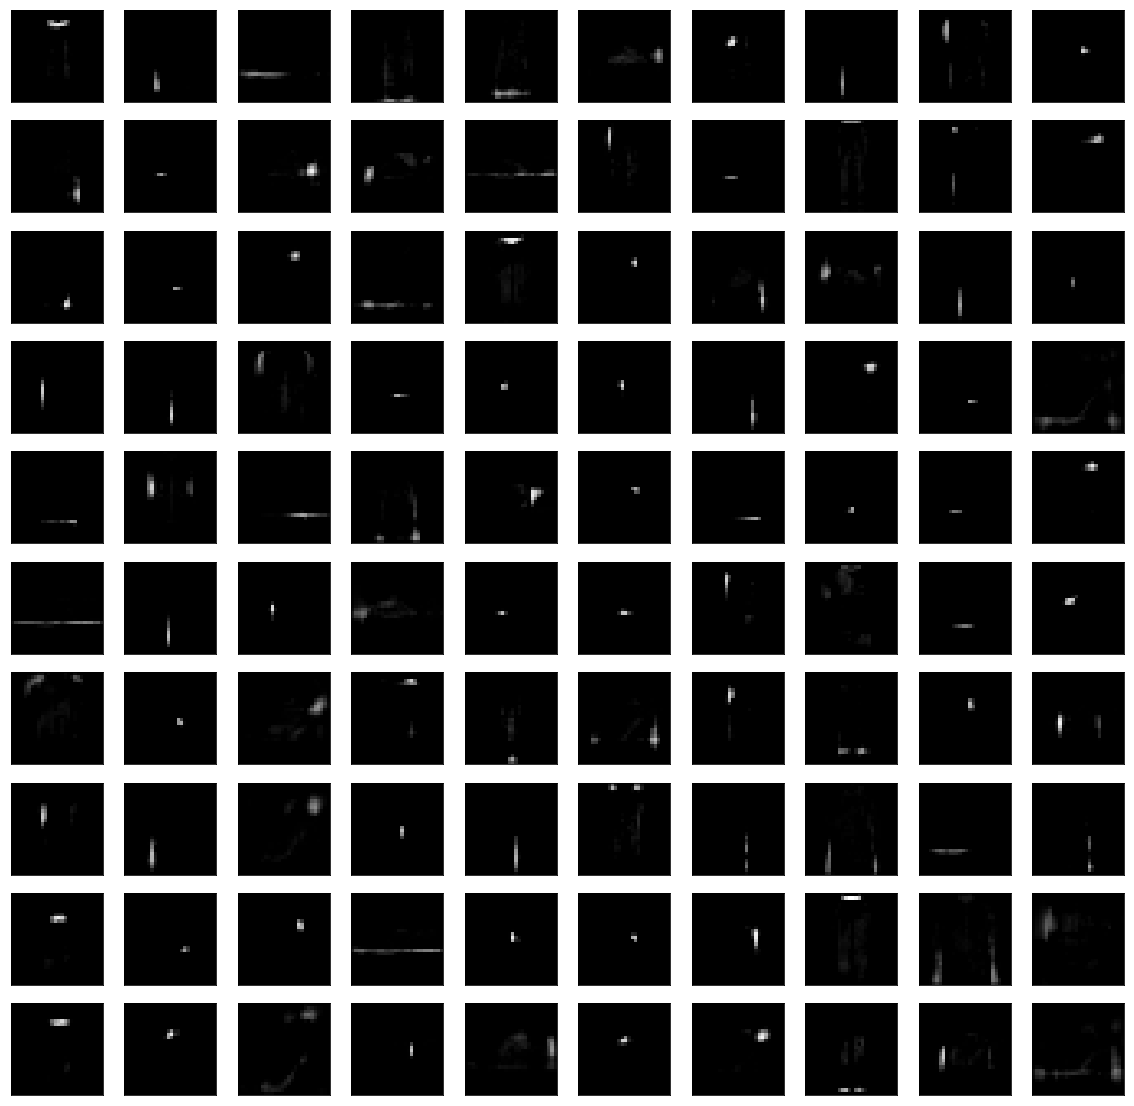

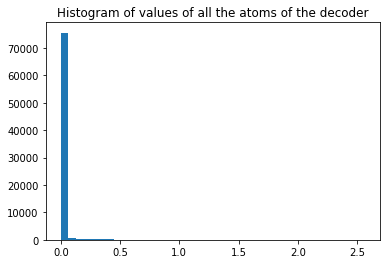

In [4]:
print('(Test) Original images and reconstructions - Reconstruction error: ', metrics.reconstruction_error(x_test, atoms, h_test))
bastien_utils.plot_all_images(x_small, same_intensity_scale=True)
bastien_utils.plot_all_images(x_rec_small, same_intensity_scale=True, v_min=0, v_max =1)
bastien_utils.plot_all_images(x_rec_small, same_intensity_scale=True)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
print('Atom images of the decoder')
bastien_utils.plot_all_images(atoms)
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

In [5]:
np.mean(np.square(x_test-x_rec_test))

0.05141151046127879

In [7]:
np.max(x_rec_test)

2.5768556594848633

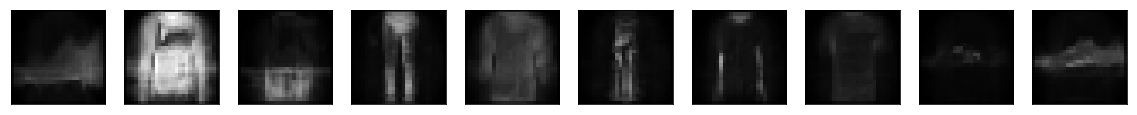

In [8]:
bastien_utils.plot_all_images(x_rec_test[idx_small])

In [9]:
x_rec_test_clipped = np.clip(x_rec_test, 0, 1)

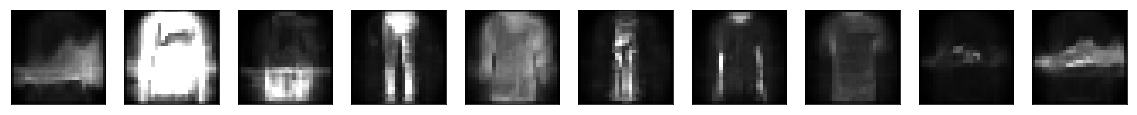

In [10]:
bastien_utils.plot_all_images(x_rec_test_clipped[idx_small])

In [11]:
np.mean(np.square(x_test-x_rec_test_clipped))

0.02877644066829073

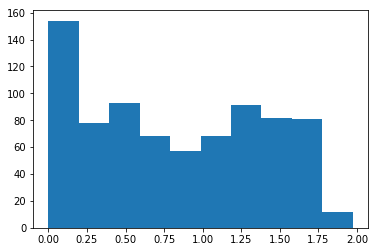

In [5]:
plt.hist(x_rec_small[1].flatten())
plt.show()

Dilatation of original images


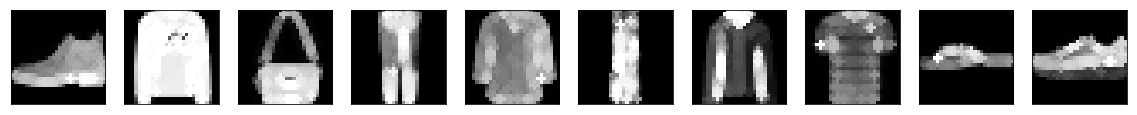

Dilatation of reconstructed images


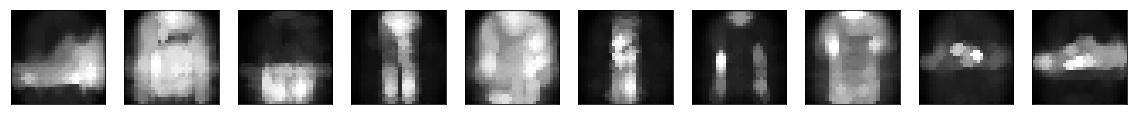

Max-approximation to dilatation
Max-approx error to original:  1.1232448039320557  - Max-approx error to reconstruction:  0.7835567841864489


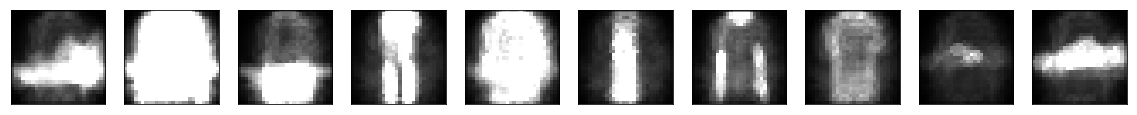

Dilated of the atom images of the decoder


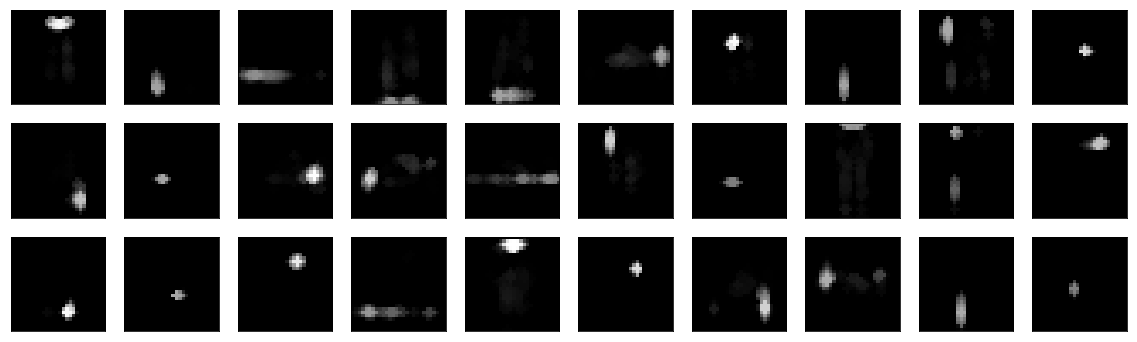

In [12]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx = metrics.max_approximation_error(x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1), same_intensity_scale=False )
print('Max-approximation to dilatation')
print('Max-approx error to original: ', max_approx[0], ' - Max-approx error to reconstruction: ', max_approx[1])
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_test[idx_small]), v_min=0, v_max=1)
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil[:30])

In [13]:
max_approx_test = metrics.reconstructions(atoms_dil, h_test)

In [14]:
x_dil_test = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

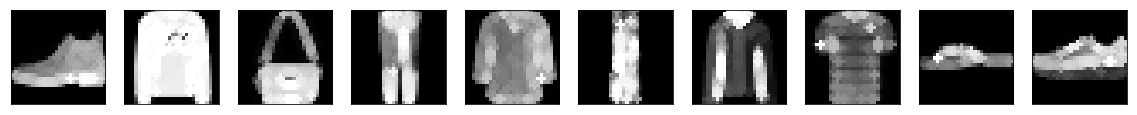

In [16]:
bastien_utils.plot_all_images(x_dil_test[idx_small])

In [17]:
np.mean(np.square(x_dil_test-max_approx_test))

1.1232448039320557

In [18]:
max_approx_test_clipped = np.clip(max_approx_test, 0, 1)

In [19]:
np.mean(np.square(x_dil_test-max_approx_test_clipped))

0.0581195232678775

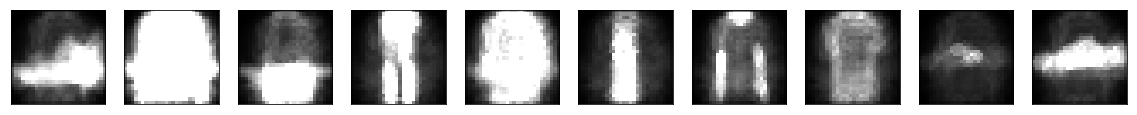

In [20]:
bastien_utils.plot_all_images(max_approx_test_clipped[idx_small])

Dilatation of original images


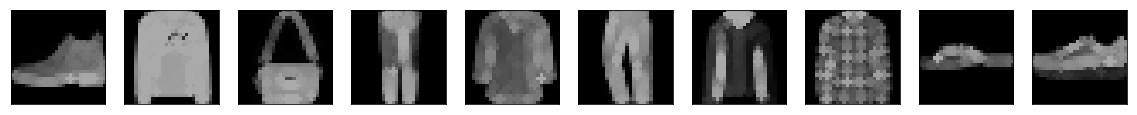

Dilatation of reconstructed images


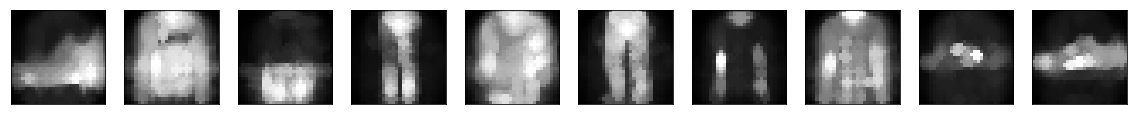

Max-approximation to dilatation
Max-approx error to original:  1.1232448039320557  - Max-approx error to reconstruction:  0.7835567841864489


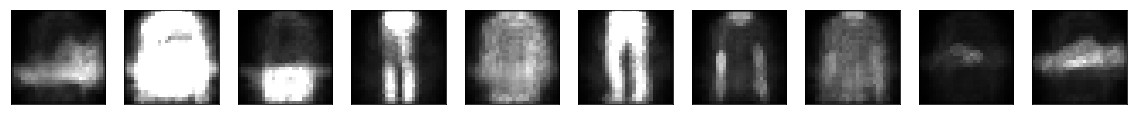

Dilated of the atom images of the decoder


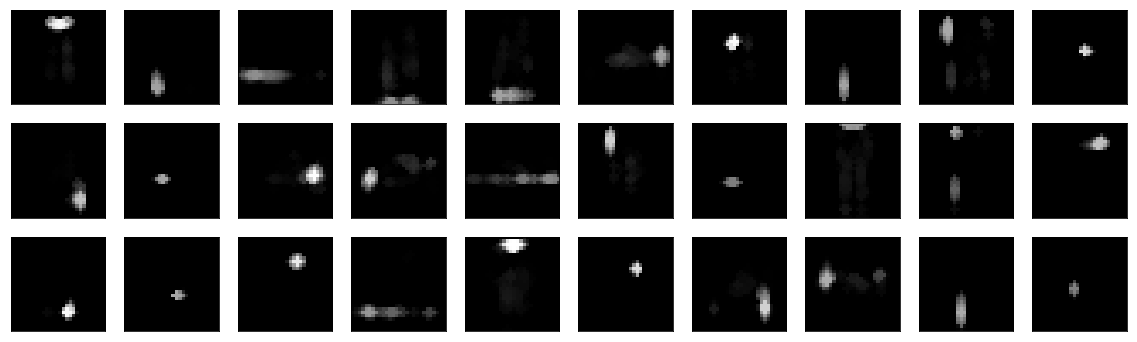

In [10]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx = metrics.max_approximation_error(x_test, atoms, h_test, morphoMaths.dilatation, SE_scale=1)
print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1), v_min=0, v_max=1.5)
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1), same_intensity_scale=False )
print('Max-approximation to dilatation')
print('Max-approx error to original: ', max_approx[0], ' - Max-approx error to reconstruction: ', max_approx[1])
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_test[idx_small]), v_min=0, v_max=2)
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil[:30])

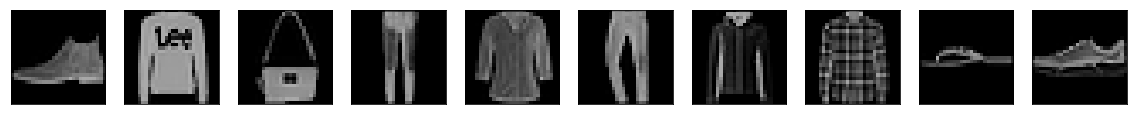

In [11]:
bastien_utils.plot_all_images(x_small, v_min=0, v_max=1.5)

In [13]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms)

0.89236367

In [14]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms_dil)

0.8153853704196772

**Question: why a larger max-appox error (than our architecture) with atoms with such small supports ?**

In [6]:
import importlib

In [70]:
importlib.reload(atoms_analysis)
importlib.reload(bastien_utils)


<module 'bastien_utils' from '../SourceCode/bastien_utils.py'>

Atoms associated with the 10 highest code coefficients of the image


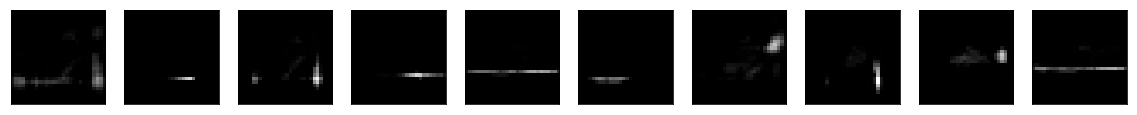

Atoms associated with the 10 highest code coefficients of the image


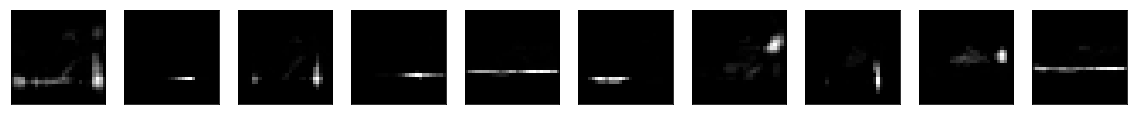

In [45]:
atoms_analysis.plot_10_most_used_atoms_for_an_image(h_test[0], atoms, same_intensity_scale=True)
atoms_analysis.plot_10_most_used_atoms_for_an_image(h_test[0], atoms, same_intensity_scale=False)

*****Otsu binarization  threshold :  0.16033084345417495  ******
*****Otsu binarization  threshold :  0.17804182695070447  ******
*****Otsu binarization  threshold :  0.18913944433931207  ******
*****Otsu binarization  threshold :  0.21525653527623484  ******
*****Otsu binarization  threshold :  0.11402970909011567  ******
*****Otsu binarization  threshold :  0.13655171596159735  ******
*****Otsu binarization  threshold :  0.23418143816648285  ******
*****Otsu binarization  threshold :  0.2714215896160506  ******
*****Otsu binarization  threshold :  0.08975490697632334  ******
*****Otsu binarization  threshold :  0.09534832940910813  ******
*****Otsu binarization  threshold :  0.08236921654003979  ******
*****Otsu binarization  threshold :  0.09280885831732763  ******
*****Otsu binarization  threshold :  0.03578281254614524  ******
*****Otsu binarization  threshold :  0.03900899547070834  ******
*****Otsu binarization  threshold :  0.10071188791957704  ******
*****Otsu binarization  th

<Figure size 1728x432 with 0 Axes>

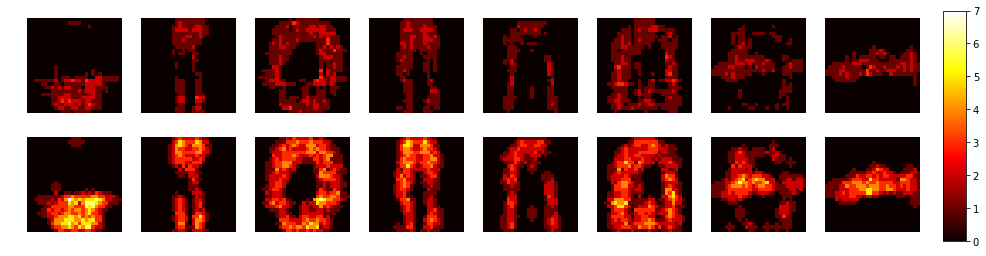

In [6]:
atoms_analysis.plot_heat_map_of_overlapping_atoms(h_test[idx_small][2:10], atoms, dilated_atoms=atoms_dil,number_of_atoms=50)

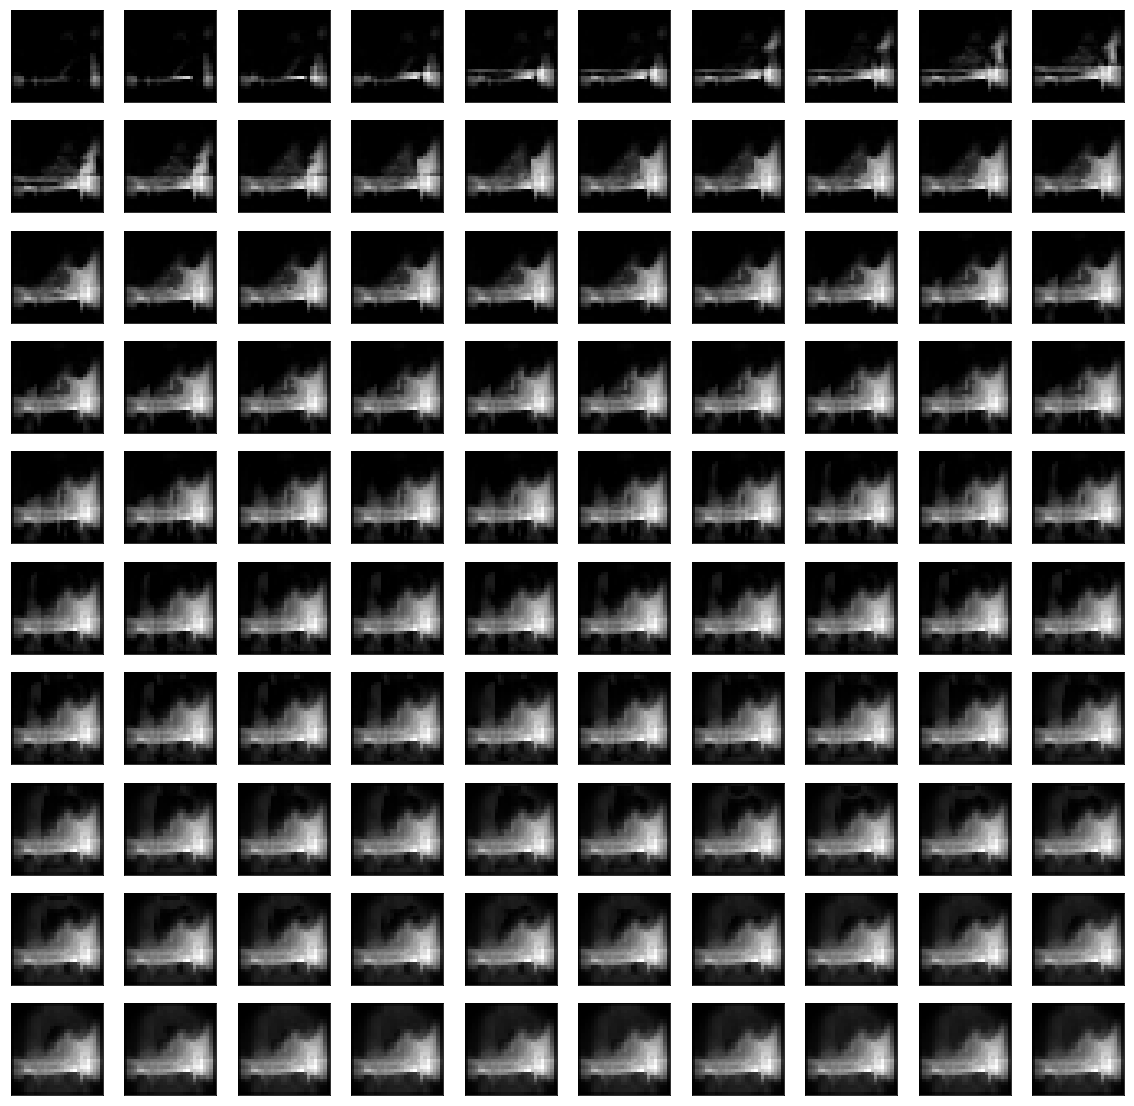

In [10]:
atoms_analysis.progressive_reconstruction(h_test[0],atoms, number_of_steps=100)

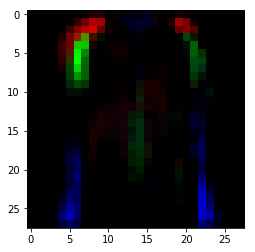

In [11]:
atoms_analysis.plot_reconstruction_using_three_most_used_atoms_as_rgb(h_test[1], atoms)

In [66]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.019844753802400365

In [15]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.035227450847121936

In [69]:
atoms_analysis.mean_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000], nb_atoms_to_use_for_threshold_computation=100)

*****Otsu binarization  threshold :  0.035677851640887964  ******
*****Otsu binarization  threshold :  0.19356588359888133  ******
*****Otsu binarization  threshold :  0.10968260356650726  ******
*****Otsu binarization  threshold :  0.05689107765368044  ******
*****Otsu binarization  threshold :  0.06372098921716313  ******
*****Otsu binarization  threshold :  0.08258788825331786  ******
*****Otsu binarization  threshold :  0.028034960110404173  ******
*****Otsu binarization  threshold :  0.04073456144640584  ******
*****Otsu binarization  threshold :  0.014047931661562194  ******
*****Otsu binarization  threshold :  0.03274323375435661  ******
*****Otsu binarization  threshold :  0.08804995712069648  ******
*****Otsu binarization  threshold :  0.028001443946103266  ******
*****Otsu binarization  threshold :  0.03231140911750108  ******
*****Otsu binarization  threshold :  0.08860984192824192  ******
*****Otsu binarization  threshold :  0.2362719788363101  ******
*****Otsu binarization

*****Otsu binarization  threshold :  0.15319740591380998  ******
*****Otsu binarization  threshold :  0.043659710208902844  ******
*****Otsu binarization  threshold :  0.008706673621108892  ******
*****Otsu binarization  threshold :  0.16832530980593327  ******
*****Otsu binarization  threshold :  0.067186533489861  ******
*****Otsu binarization  threshold :  0.07226891388950757  ******
*****Otsu binarization  threshold :  0.0701925054107404  ******
*****Otsu binarization  threshold :  0.15712668872771754  ******
*****Otsu binarization  threshold :  0.03383801201342065  ******
*****Otsu binarization  threshold :  0.09972585878991003  ******
*****Otsu binarization  threshold :  0.09136777745755062  ******
*****Otsu binarization  threshold :  0.054099397372312945  ******
*****Otsu binarization  threshold :  0.026775057352914453  ******
*****Otsu binarization  threshold :  0.10671511592427199  ******
*****Otsu binarization  threshold :  0.25506908246994353  ******
*****Otsu binarization  

*****Otsu binarization  threshold :  0.03104179550892872  ******
*****Otsu binarization  threshold :  0.03325630554610443  ******
*****Otsu binarization  threshold :  0.20790985783956756  ******
*****Otsu binarization  threshold :  0.08311779171400634  ******
*****Otsu binarization  threshold :  0.02167827705388815  ******
*****Otsu binarization  threshold :  0.1681775509698635  ******
*****Otsu binarization  threshold :  0.13248426564782667  ******
*****Otsu binarization  threshold :  0.10688063668478419  ******
*****Otsu binarization  threshold :  0.04366937268005107  ******
*****Otsu binarization  threshold :  0.056259915245646636  ******
*****Otsu binarization  threshold :  0.15848218691774466  ******
*****Otsu binarization  threshold :  0.04689749361980718  ******
*****Otsu binarization  threshold :  0.03450385814893792  ******
*****Otsu binarization  threshold :  0.09152032229101678  ******
*****Otsu binarization  threshold :  0.24442541211567217  ******
*****Otsu binarization  t

*****Otsu binarization  threshold :  0.1700946691664636  ******
*****Otsu binarization  threshold :  0.07263264662539769  ******
*****Otsu binarization  threshold :  0.11368966168129119  ******
*****Otsu binarization  threshold :  0.04190199395499633  ******
*****Otsu binarization  threshold :  0.0739400677831808  ******
*****Otsu binarization  threshold :  0.12146753661947826  ******
*****Otsu binarization  threshold :  0.049424462748940926  ******
*****Otsu binarization  threshold :  0.024667190817311918  ******
*****Otsu binarization  threshold :  0.07733937427757442  ******
*****Otsu binarization  threshold :  0.1026852938682504  ******
*****Otsu binarization  threshold :  0.134297010258841  ******
*****Otsu binarization  threshold :  0.0851359323545898  ******
*****Otsu binarization  threshold :  0.015047530153162037  ******
*****Otsu binarization  threshold :  0.027818747953678002  ******
*****Otsu binarization  threshold :  0.07683304031690914  ******
*****Otsu binarization  thr

*****Otsu binarization  threshold :  0.23640339426014761  ******
*****Otsu binarization  threshold :  0.14068968258679793  ******
*****Otsu binarization  threshold :  0.09473619011453788  ******
*****Otsu binarization  threshold :  0.14224058075229598  ******
*****Otsu binarization  threshold :  0.09980449360710107  ******
*****Otsu binarization  threshold :  0.08237797222476642  ******
*****Otsu binarization  threshold :  0.036123438347026526  ******
*****Otsu binarization  threshold :  0.02824294768323293  ******
*****Otsu binarization  threshold :  0.05619680598861627  ******
*****Otsu binarization  threshold :  0.13138307646346287  ******
*****Otsu binarization  threshold :  0.05527510395012088  ******
*****Otsu binarization  threshold :  0.05408080259276821  ******
*****Otsu binarization  threshold :  0.15991220494158404  ******
*****Otsu binarization  threshold :  0.11433676779510246  ******
*****Otsu binarization  threshold :  0.05574292547171487  ******
*****Otsu binarization  

*****Otsu binarization  threshold :  0.04494440270290854  ******
*****Otsu binarization  threshold :  0.1999162840664403  ******
*****Otsu binarization  threshold :  0.14179325253262653  ******
*****Otsu binarization  threshold :  0.03136690985016045  ******
*****Otsu binarization  threshold :  0.14656000099298427  ******
*****Otsu binarization  threshold :  0.05812364191398382  ******
*****Otsu binarization  threshold :  0.026592522170054415  ******
*****Otsu binarization  threshold :  0.07288357730687914  ******
*****Otsu binarization  threshold :  0.12404008684524138  ******
*****Otsu binarization  threshold :  0.07076022854384212  ******
*****Otsu binarization  threshold :  0.09268197570112159  ******
*****Otsu binarization  threshold :  0.03890518222186471  ******
*****Otsu binarization  threshold :  0.014958799142698924  ******
*****Otsu binarization  threshold :  0.15057306208054377  ******
*****Otsu binarization  threshold :  0.1557973571633934  ******
*****Otsu binarization  t

*****Otsu binarization  threshold :  0.08711178009066263  ******
*****Otsu binarization  threshold :  0.20723112464688892  ******
*****Otsu binarization  threshold :  0.19223310481638417  ******
*****Otsu binarization  threshold :  0.11732670341048532  ******
*****Otsu binarization  threshold :  0.2048287664322105  ******
*****Otsu binarization  threshold :  0.16191587997905607  ******
*****Otsu binarization  threshold :  0.05205808361792645  ******
*****Otsu binarization  threshold :  0.06749790324421401  ******
*****Otsu binarization  threshold :  0.13378624422667834  ******
*****Otsu binarization  threshold :  0.17051061915560556  ******
*****Otsu binarization  threshold :  0.09881973016605634  ******
*****Otsu binarization  threshold :  0.05752863261473724  ******
*****Otsu binarization  threshold :  0.031206878373287172  ******
*****Otsu binarization  threshold :  0.12507123703165002  ******
*****Otsu binarization  threshold :  0.014357261412182219  ******
*****Otsu binarization  

*****Otsu binarization  threshold :  0.15430610362472844  ******
*****Otsu binarization  threshold :  0.13465792828944248  ******
*****Otsu binarization  threshold :  0.0327422655484457  ******
*****Otsu binarization  threshold :  0.05052125123032277  ******
*****Otsu binarization  threshold :  0.11611860188154989  ******
*****Otsu binarization  threshold :  0.02066941676403309  ******
*****Otsu binarization  threshold :  0.01774668024984519  ******
*****Otsu binarization  threshold :  0.012047427170116856  ******
*****Otsu binarization  threshold :  0.07366299582076873  ******
*****Otsu binarization  threshold :  0.10948901303459253  ******
*****Otsu binarization  threshold :  0.11369215804558079  ******
*****Otsu binarization  threshold :  0.11862876805816651  ******
*****Otsu binarization  threshold :  0.07981241457080207  ******
*****Otsu binarization  threshold :  0.043100615894416106  ******
*****Otsu binarization  threshold :  0.09973408286350086  ******
*****Otsu binarization  

0.0031307328636939855

In [71]:
atoms_analysis.mean_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000], nb_atoms_to_use_for_threshold_computation=100)

0.014036503920867518

In [72]:
atoms_analysis.mean_overlap_coef_of_atoms_weighted_by_images_code(atoms, h_test[:1000], nb_atoms_to_use_for_threshold_computation=100)

0.002436822921984665

In [76]:
atoms_analysis.mean_overlap_coef_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000], nb_atoms_to_use_for_threshold_computation=10)

0.013598585473461754

**Results on the training data**

In [16]:
#loading training data instead
del x_test, y_test, h_test, x_rec_test
FILE_PATH = "../"
x_train, y_train = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=False, subsetTest=False)

In [17]:
h_train = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/h_train.mat")['h_train']
x_rec_train = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/x_rec_train.mat")['x_rec_train']
atoms = io.loadmat("../Results/NNSAE/18_11_07_fashion_MNIST_lrateR0_01_lrateIP_001_regR0_0002/Results_NNSAE/W.mat")['W']
x_rec_train = x_rec_train.reshape((60000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
idx_small = np.arange(10)
idx_small[2]=18
idx_small[4]=19
idx_small[7]=16
idx_small[9]=23
x_rec_small = x_rec_train[idx_small]
x_small=x_train[idx_small]

(Train) Original images and reconstructions - Reconstruction error:  0.05138200707165478


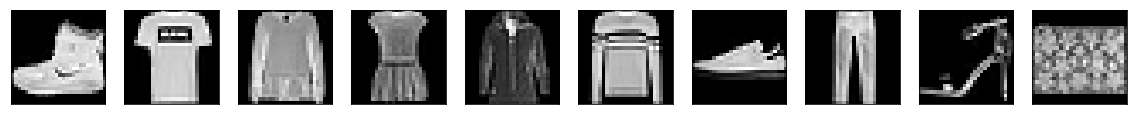

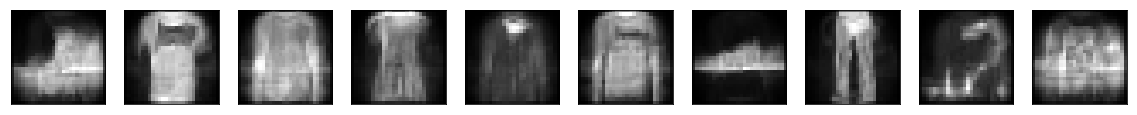

Histograms of the encodings - Sparsity (Hoyer):  0.22111380272706213


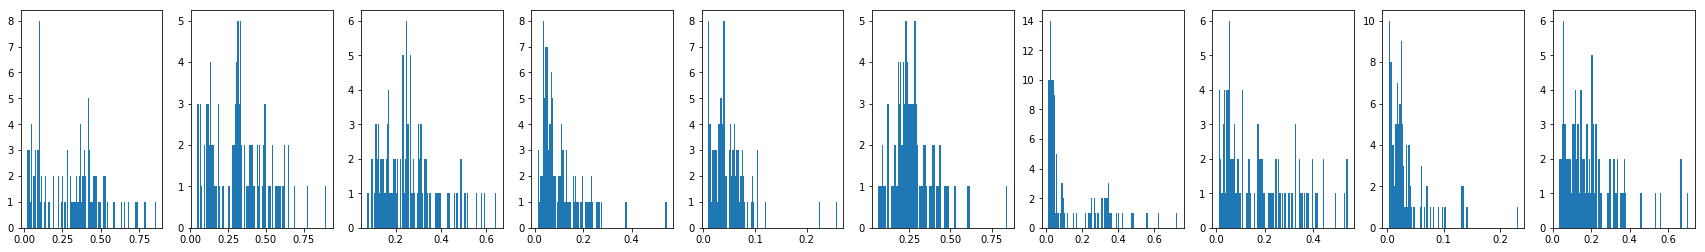

Atom images of the decoder


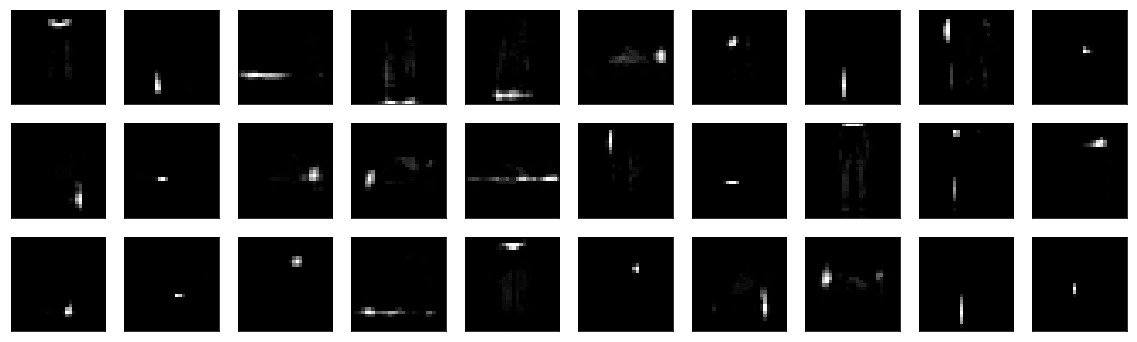

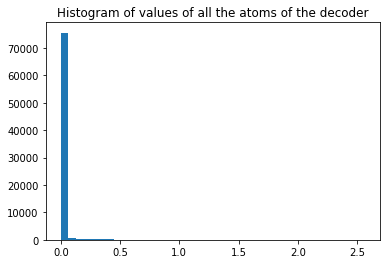

In [5]:
print('(Train) Original images and reconstructions - Reconstruction error: ', metrics.reconstruction_error(x_train, atoms, h_train))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_train))
metrics.plot_histograms_of_the_encoding(h_train[idx_small])
print('Atom images of the decoder')
bastien_utils.plot_all_images(atoms[:30])
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of original images


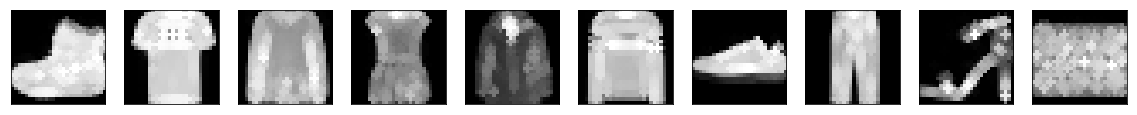

Dilatation of reconstructed images


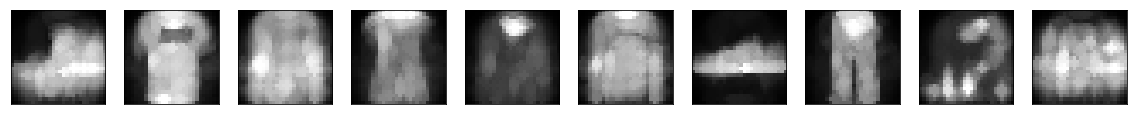

Max-approx error to original:  1.1247425726107918  - Max-approx error to reconstruction:  0.7843505021452586


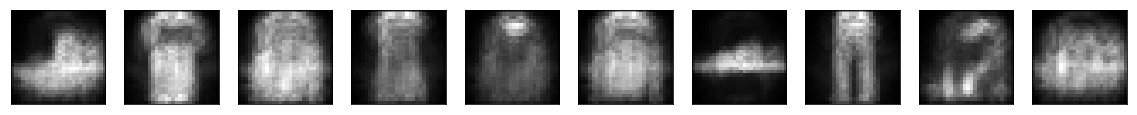

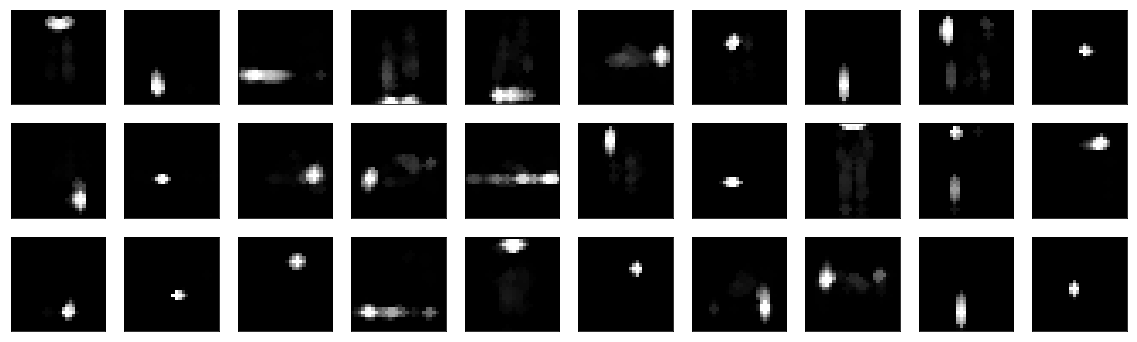

In [6]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx = metrics.max_approximation_error(x_train, atoms, h_train, morphoMaths.dilatation, SE_scale=1)

print('Dilatation of original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of reconstructed images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
print('Max-approx error to original: ', max_approx[0], ' - Max-approx error to reconstruction: ', max_approx[1])
bastien_utils.plot_all_images(metrics.reconstructions(atoms_dil, h_train[idx_small]))
bastien_utils.plot_all_images(atoms_dil[:30])

In [18]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_train[:1000])

0.019731666941777956

In [19]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_train[:1000])

0.03504103653110357